# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** XXXX

**Author 1 (sciper):** Jennifer Abou-Najm (312656)  
**Author 2 (sciper):** Valérie Costa (315855)   
**Author 3 (sciper):** Arthur Wuhrmann (344752)  

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

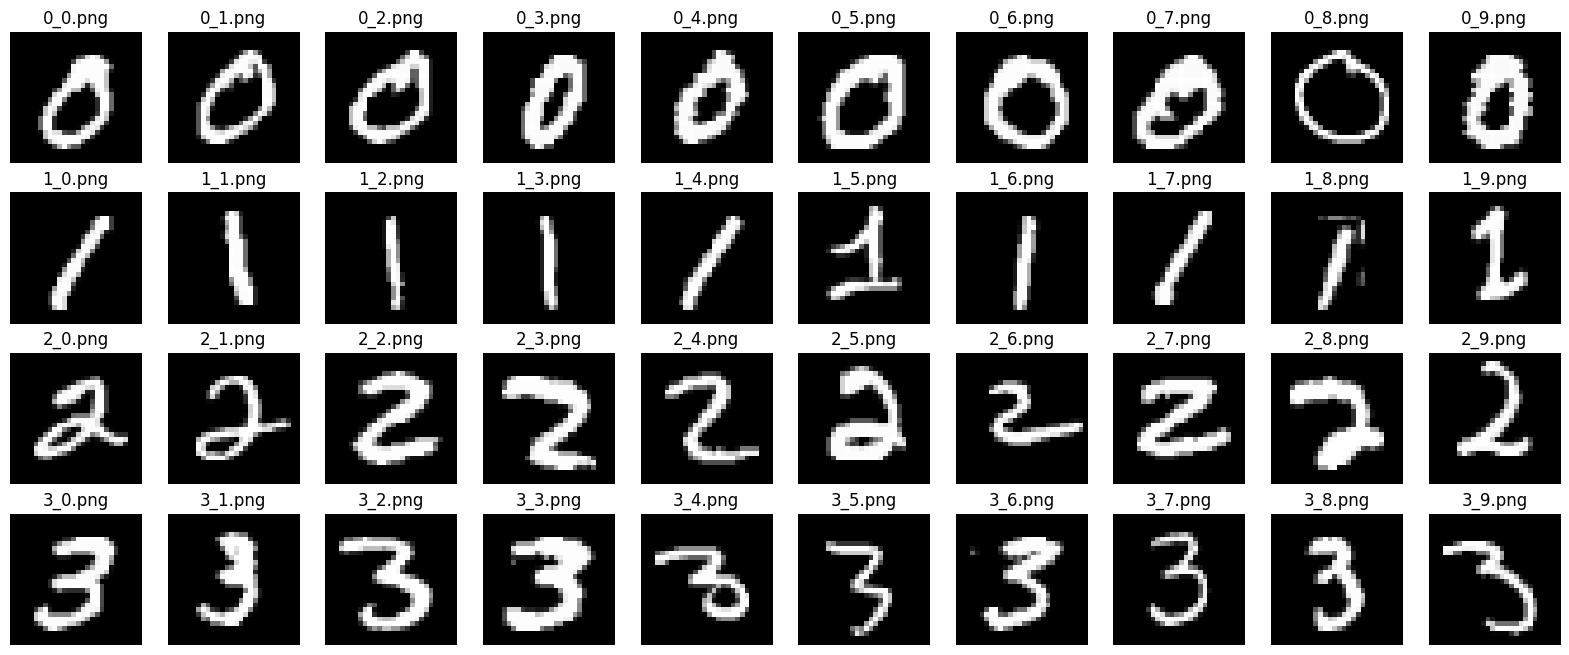

In [2]:
import skimage.io
import matplotlib.pyplot as plt
from skimage.measure import find_contours
import numpy as np
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray' ,interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

In [3]:
def preprocess(image):
    pre = skimage.filters.median(image, footprint=skimage.morphology.disk(2))
    pre = skimage.morphology.remove_small_holes(pre,200)
    pre = skimage.morphology.remove_small_objects(pre, 5)
    return pre  

C:\Users\Quinella\AppData\Local\Temp\ipykernel_27908\845926270.py:3: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  pre = skimage.morphology.remove_small_holes(pre,200)


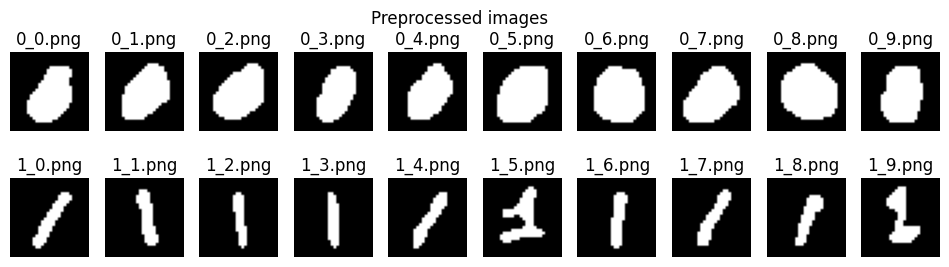

In [4]:
# TODO: Fill the lists below with your preprocessed images of "0"s and "1"s  
zeros = []
ones = []

for img in zeros_im:
    zeros.append(preprocess(img))
for img in ones_im:
    ones.append(preprocess(img))

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

In [51]:
def sample_contours(contours, n=0):
    total_dist = np.sum([np.linalg.norm(contours[0][i] - contours[0][i-1]) 
                         for i in range(len(contours[0])-1)])
    if n == 0 or total_dist < n:
        distance = 1
    else:
        distance = total_dist / n
    points = [contours[0][0]]
    d_cumul = 0

    for i in range(1, len(contours[0])):
        d_curr = np.linalg.norm(contours[0][i] - contours[0][i-1])
        if d_cumul + d_curr >= distance:
            a = d_cumul + d_curr - distance
            a = a / d_curr
            points.append((1-a) * contours[0][i] + (a) * contours[0][i-1])
            d_cumul = d_curr + d_cumul - distance
        else:
            d_cumul += d_curr
    points = np.array(points)
    return points

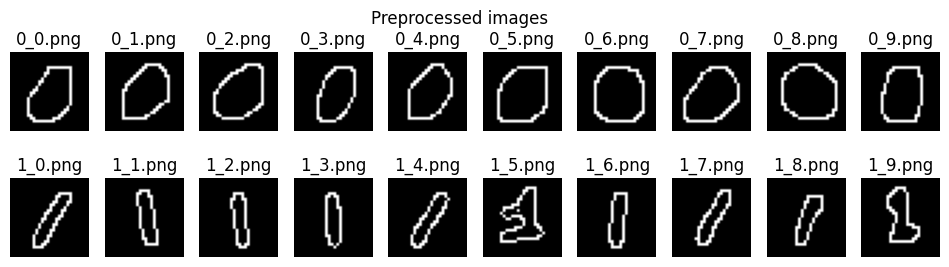

In [ ]:
def get_gradient(img):
    return skimage.feature.canny(img,1.5)

zeros_gradient = []
ones_gradient = []

for img in zeros:
    zeros_gradient.append(get_gradient(img))
for img in ones:
    ones_gradient.append(get_gradient(img))

# Plot images
fig, axes = plt.subplots(2, len(zeros_gradient), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_gradient, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_gradient, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

#### Discussion

TODO

### 1.2. Get descriptors (4 pts)

In [42]:
def get_descriptors(img, n=0):
    contours = find_contours(img)
    points = sample_contours(contours, n)    
    return np.fft.fft(points[:, 0] + 1j * points[:, 1])

print(get_descriptors(zeros_im[0])[:10])

[ 436.15364059+1132.91280668j -530.48113358 -272.84962594j
 -155.52812623  +54.4382369j  -198.75545472 -132.66497455j
  -81.3762192  -137.52021641j    6.82086466  +34.56929652j
 -144.52112947   -6.11443919j  -96.61162391  -59.39017458j
  -14.26728447  -16.24743941j -134.73536935  -53.26451312j]


In [45]:
def get_simple_desc(img, num=2, n=0):
    descriptors = get_descriptors(img, d)
    recons_freq = np.zeros_like(descriptors)
    recons_freq[:num] = descriptors[:num]
    recons_freq[-num:] = descriptors[-num:]   

    return recons_freq 

#### Discussion

TODO

### 1.3. Study effect of descriptors (6 pts)

In [46]:
def get_contours(descriptors,num):
    des = descriptors.copy()
    des[0]=0
    des[num+1:-num]=0
    ft = np.fft.ifft(des)
    x=np.real(ft)
    y=np.imag(ft)
    return np.array([x,y])

In [47]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zeros_im[0]
one = ones_im[0]

C:\Users\Quinella\AppData\Local\Temp\ipykernel_27908\845926270.py:3: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  pre = skimage.morphology.remove_small_holes(pre,200)


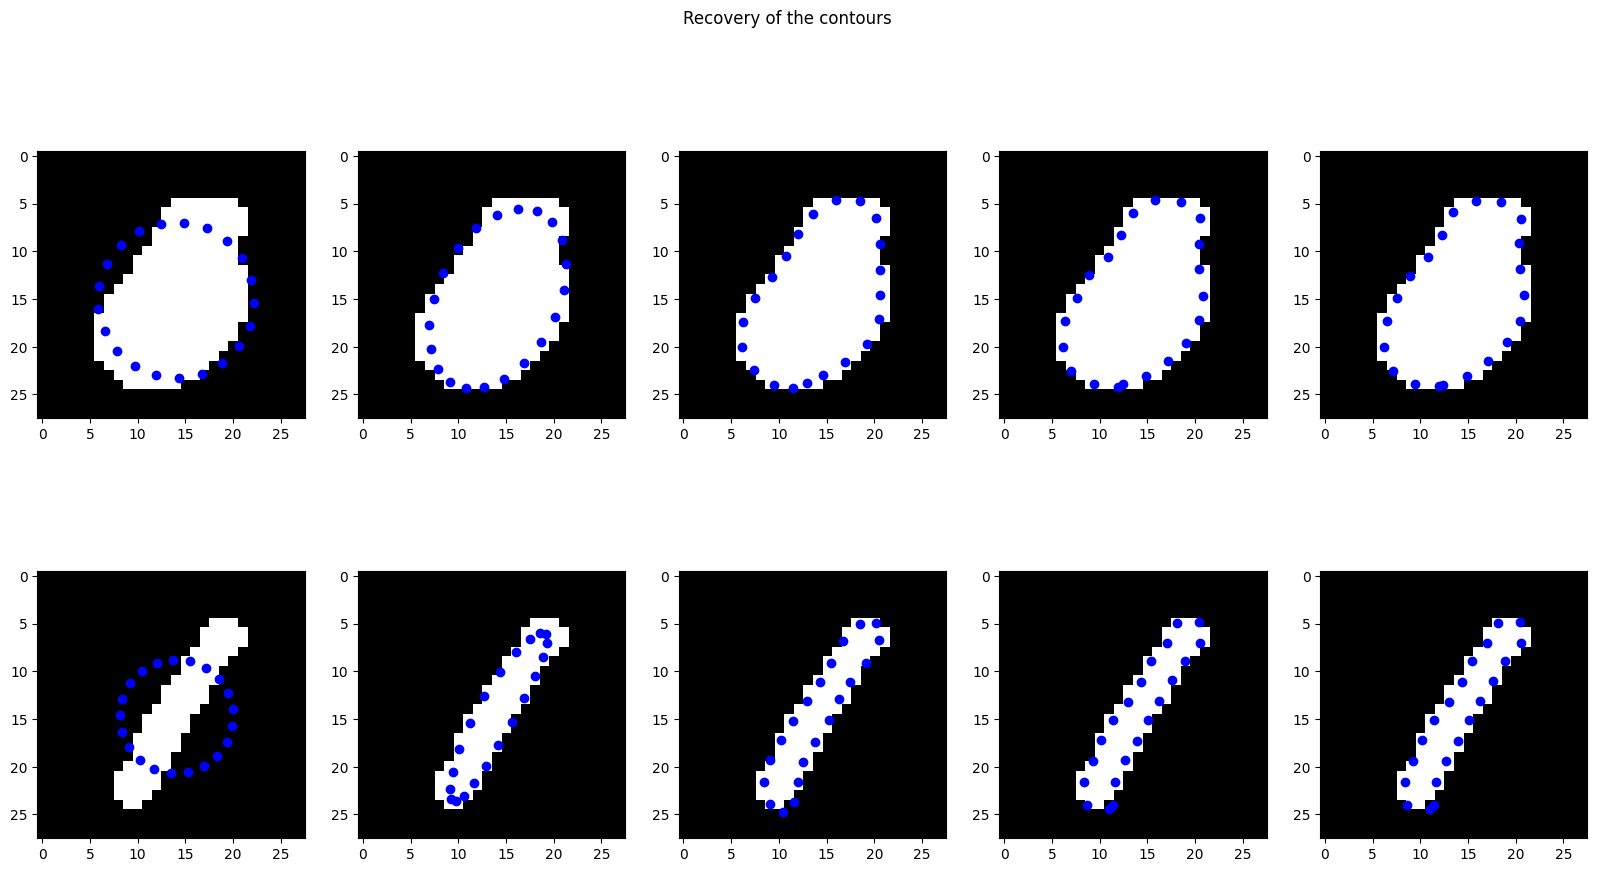

In [56]:
# On each of the 5 plots you will show the recovery for a "0" and a "1" (used the same axis for both a "0" and a "1").
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

n = 20 # number of points we want on each contour..., 0 if we want the maximum

# Plot recovery for a zero image
img = zero
for n, ax in zip(descr_set_sizes, axes[0,:]):
    ax.imshow(preprocess(img), cmap='gray', alpha=1)

    recons_freq = get_simple_desc(img, n, d)
    recons_sign = np.fft.ifft(recons_freq)
    [x, y] = [np.imag(recons_sign), np.real(recons_sign)]
    ax.scatter(x, y, c='b')

# Plot recovery for a one image
img = one
for n, ax in zip(descr_set_sizes, axes[1,:]):
    ax.imshow(preprocess(img), cmap='gray', alpha=1)

    recons_freq = get_simple_desc(img, n, d)    
    recons_sign = np.fft.ifft(recons_freq)
    [x, y] = [np.imag(recons_sign), np.real(recons_sign)]
    ax.scatter(x, y, c='b')

fig.suptitle("Recovery of the contours")
plt.show()

#### Discussion

TODO

### 1.4 Clustering (2 pts)

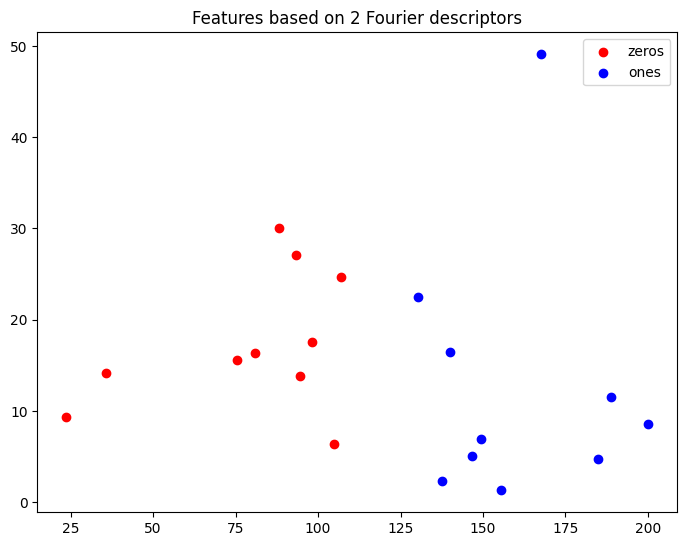

In [70]:
# TODO: You should fill the lists below, with your features

# Descriptors for all "0"s
zeros_f = [get_descriptors(zeros[i]) for i in range(len(zeros))]
# First feature for all "0"s
zeros_f1 = [abs(zeros_f[i][1]) for i in range(len(zeros))]
# Second feature for all "0"s
zeros_f2 = [abs(zeros_f[i][2]) for i in range(len(zeros))]
# Descriptors for all "1"s
ones_f = [get_descriptors(ones[i]) for i in range(len(ones))]
# Fist feature for all "1"s
ones_f1 = [abs(ones_f[i][1]) for i in range(len(ones))]
# Second feature for all "1"s
ones_f2 = [abs(ones_f[i][2]) for i in range(len(ones))]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

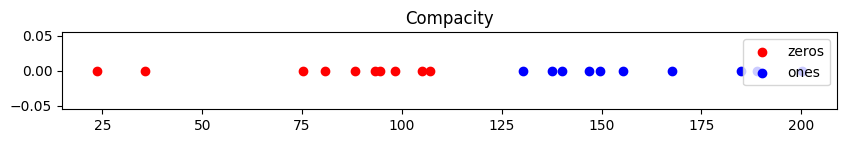

In [116]:
plt.figure(figsize=(10,1))

plt.scatter(zeros_f1, np.zeros_like(zeros_f1),color='r', label="zeros")
plt.scatter(ones_f1, np.zeros_like(ones_f1),color='b', label="ones")

plt.title("Compacity")
plt.legend()
plt.show()

#### Discussion


TODO

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

TODO

#### Implementation

In [79]:
# TODO: Implement a function that takes as input an image and outputs 
# a set of features invariant to scale, rotation and translation, according to function boolean parameters.
# You may use your functions defined in section 1.B.

def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    
    f1, f2 = np.abs(get_descriptors(img)[1:3])
    if inv_to_scale:
        [f1, f2] = [f1, f2] / f2;
    return [f1, f2]

In [109]:
# Define custom rotation function. You may add other parameters to the function.
def random_rotate(img):
    angle = np.random.rand() * 360
    return skimage.transform.rotate(img, angle)
    

# Define custom rotation function. You may add other parameters to the function.
def random_translate(img, d=2):
    displacement = 2 * d * (np.random.rand(2,1) - 0.5)
    matrix = skimage.transform.AffineTransform(translation=list(displacement))
    return skimage.transform.warp(img, matrix, preserve_range=True, order=0)
    
# Define custom rotation function. You may add other parameters to the function.
def random_scale(img):
    scale = np.random.uniform(0.3, 1)
    return skimage.transform.rescale(img, scale, preserve_range=True)

def random_transform(img):
    return random_rotate(random_translate(random_scale(img)))

In [110]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros = [random_rotate(zero) for zero in zeros]
rotated_images_ones = [random_rotate(one) for one in ones]

# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = [random_translate(zero) for zero in zeros]
translated_images_ones = [random_translate(one) for one in ones]

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = [random_scale(zero) for zero in zeros]
scaled_images_ones = [random_scale(one) for one in ones]

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros = [random_transform(zero) for zero in zeros]
transformed_images_ones = [random_transform(one) for one in ones]

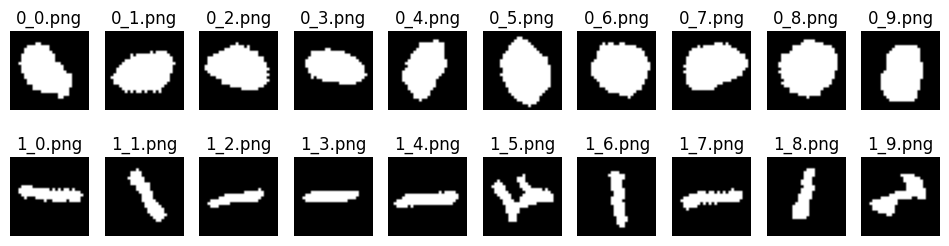

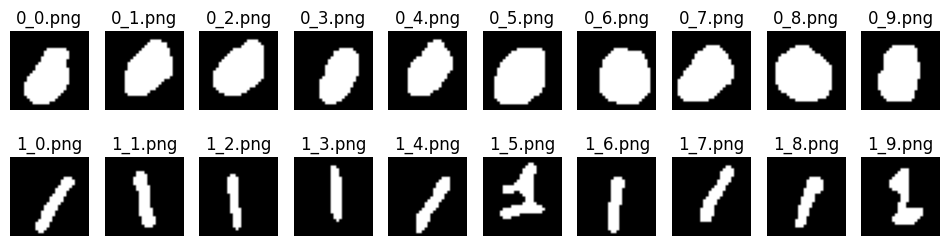

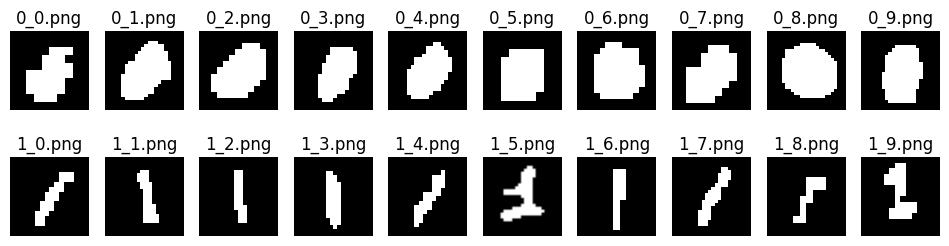

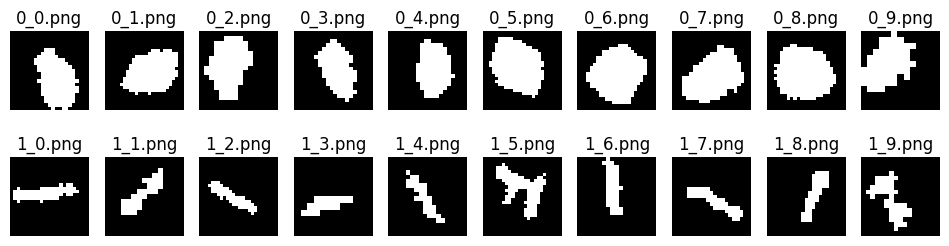

In [113]:
transformed_img = [
    [rotated_images_zeros, rotated_images_ones],
    [translated_images_zeros, translated_images_ones],
    [scaled_images_zeros, scaled_images_ones],
    [transformed_images_zeros, transformed_images_ones],
]

for i in range(4):
    fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
    for ax, im, nm in zip(axes[0], transformed_img[i][0], zeros_names):
        ax.imshow(im, cmap='gray')
        ax.axis('off')
        ax.set_title(nm)
    for ax, im, nm in zip(axes[1], transformed_img[i][1], ones_names):
        ax.imshow(im, cmap='gray')
        ax.axis('off')
        ax.set_title(nm)
    plt.show()

In [135]:
len(transformed_img[i][0])

10

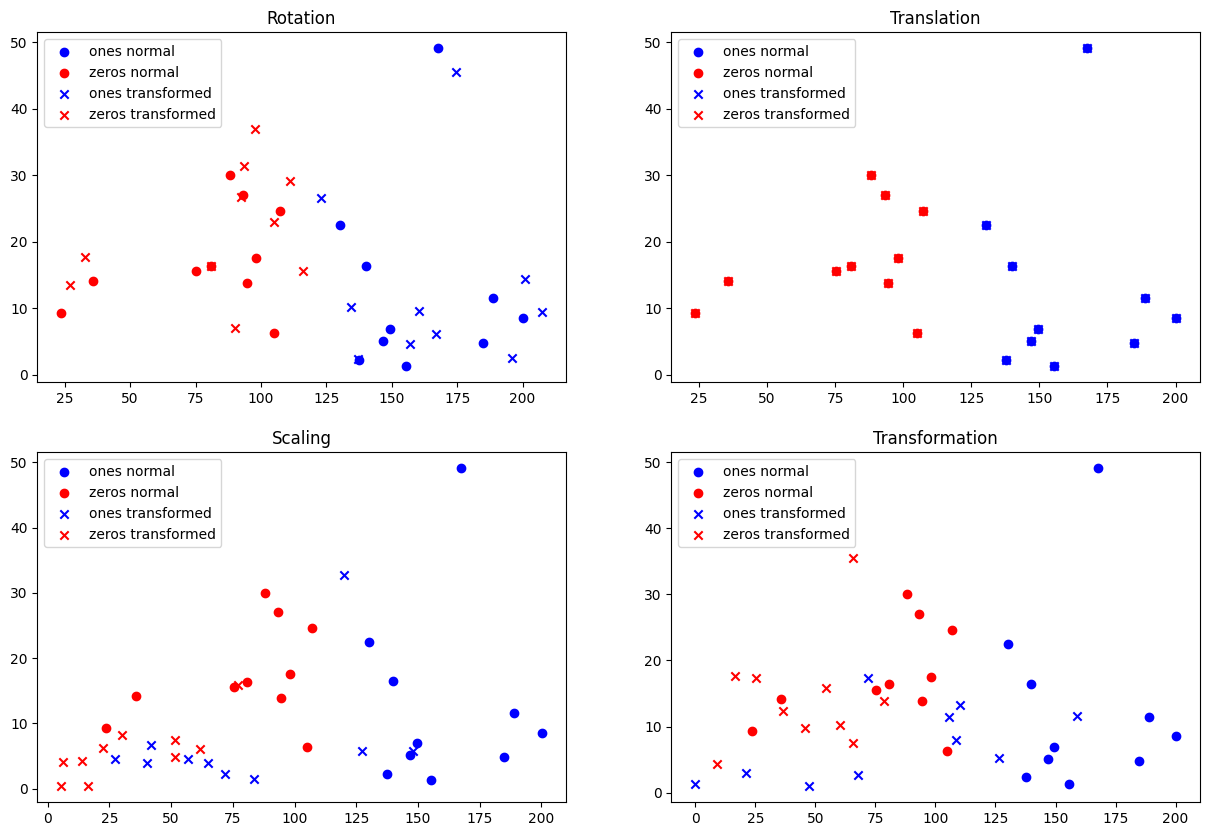

In [145]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invaiant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!
fig, ax = plt.subplots(2,2, figsize=(15,10))

titles = ["Rotation", "Translation", "Scaling", "Transformation"]

for i in range(len(transformed_img)):

    zeros_trans = transformed_img[i][0]
    ones_trans = transformed_img[i][1]

    [ones_f1, ones_f2] =   [[get_invariant_features(one)[0] for one in ones], 
                            [get_invariant_features(one)[1] for one in ones]]
    
    [zeros_f1, zeros_f2] = [[get_invariant_features(zero)[0] for zero in zeros], 
                            [get_invariant_features(zero)[1] for zero in zeros]]
    ax.ravel()[i].scatter(ones_f1, ones_f2, c='b', label='ones normal')
    ax.ravel()[i].scatter(zeros_f1, zeros_f2, c='r', label='zeros normal')
    
    [ones_f1, ones_f2] =   [[get_invariant_features(one)[0] for one in ones_trans], 
                            [get_invariant_features(one)[1] for one in ones_trans]]
    
    [zeros_f1, zeros_f2] = [[get_invariant_features(zero)[0] for zero in zeros_trans], 
                            [get_invariant_features(zero)[1] for zero in zeros_trans]]

    ax.ravel()[i].scatter(ones_f1, ones_f2, c='b', marker='x', label='ones transformed')
    ax.ravel()[i].scatter(zeros_f1, zeros_f2, c='r', marker='x', label='zeros transformed')
    ax.ravel()[i].legend(loc="best")
    ax.ravel()[i].set_title(titles[i])

# TODO

#### Discussion

TODO

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

In [377]:
from scipy.signal import find_peaks

In [146]:
def preprocess(image):
    pre = skimage.filters.gaussian(image, sigma=0.2)
    pre = image > 100
    pre = skimage.morphology.remove_small_holes(pre,200)
    pre = skimage.morphology.remove_small_objects(pre,5)
    return pre

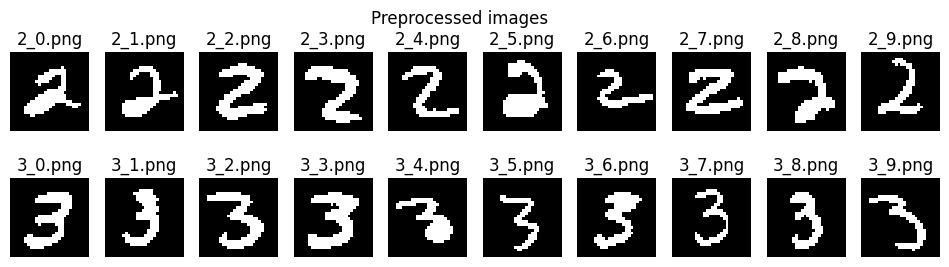

In [210]:
twos = []
threes = []

for img in twos_im:
    twos.append(preprocess(img))
for img in threes_im:
    threes.append(preprocess(img))

# Plot images
fig, axes = plt.subplots(2, len(twos), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos, twos_names):
    ax.imshow(im, cmap='gray', interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes, threes_names):
    ax.imshow(im, cmap='gray', interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

In [481]:
# Skeletonize and then apply a dilation with a r=1 disk.
def apply_skel(img):
    disk = skimage.morphology.disk(1)
    skel = skimage.morphology.skeletonize(img)
    return skimage.morphology.dilation(skel, disk)

In [356]:
twos_post = [apply_skel(two) for two in twos]
threes_post = [apply_skel(three) for three in threes]

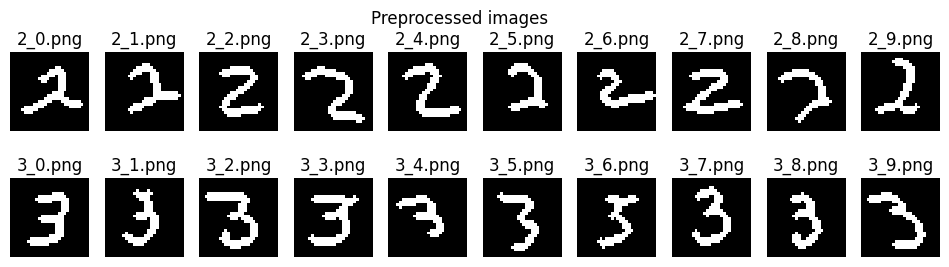

In [357]:
# TEST FEATURES
twos_display = twos_post
threes_display = threes_post

fig, axes = plt.subplots(2, len(twos), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_display, twos_names):
    ax.imshow(im, cmap='gray', interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_display, threes_names):
    ax.imshow(im, cmap='gray', interpolation="nearest")
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

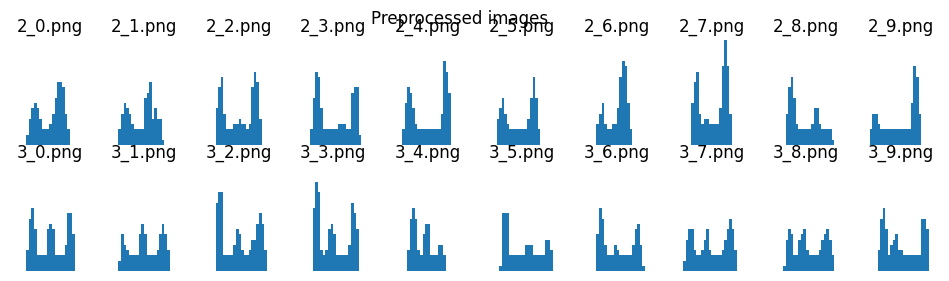

In [464]:
fig, axes = plt.subplots(2, len(twos), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_display, twos_names):
    h = np.sum(im, axis=1)
    ax.hist(range(28), bins=28, weights=h)
    ax.set_ylim([0, 20])
    ax.axis('off')
    ax.set_title(nm)
print()
for ax, im, nm in zip(axes[1], threes_display, threes_names):
    h = np.sum(im, axis=1)
    ax.hist(range(28), bins=28, weights=h)
    ax.set_ylim([0, 20])
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

In [468]:
def sum_angles(img):
    points = find_contours(img)[0]
    vectors = np.diff(points, axis=0)
    lengths = np.linalg.norm(vectors, axis=1)
    dot_products = np.sum(vectors[:-1] * vectors[1:], axis=1)
    # Compute the cosine of each angle using the law of cosines
    cos_angles = dot_products / (lengths[:-1] * lengths[1:])
    angles = np.arccos(cos_angles)
    return (np.sum(np.abs(angles)))

def get_peak_desc(img, distance=1):
    y_sum = np.sum(img, axis=1)
    peaks = y_sum[find_peaks(y_sum, distance=distance)[0]]
    return np.sum(np.power(peaks, 2))

# Get the average number of peaks found by find_peaks with different prominence
def get_peaks_number(img, d1=1, d2=7):
    y_sum = np.sum(img, axis=1)
    peak_numbers = [len(find_peaks(y_sum, prominence=d)[0]) for d in range(d1, d2)]
    return np.mean(peak_numbers)

def size(img, axis=0):
    x_first = np.where(np.sum(img, axis=axis) > 0)[0][0]
    x_last = np.where(np.sum(img, axis=axis) > 0)[0][-1]

    return x_last - x_first

def area(img):
    return np.count_nonzero(img!=0)

def perimeter(img):
    return skimage.measure.perimeter(skimage.morphology.convex_hull_object(img))

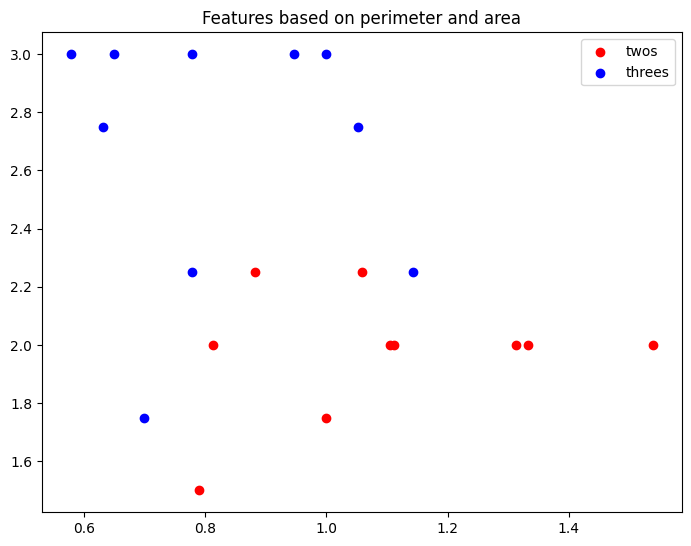

In [478]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = [size(img, axis=0)/size(img, axis=1) for img in twos_post]
twos_f2 = [get_peaks_number(img, 2, 6) for img in twos_post]
threes_f1 = [size(img, axis=0)/size(img, axis=1) for img in threes_post]
threes_f2 = [get_peaks_number(img,2 ,6) for img in threes_post]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

In [479]:
def compacity(img):
    x = size(img, axis=0)/size(img, axis=1)
    y = get_peaks_number(img)
    return (x - 1.4) - 1 * (y - 0.4)

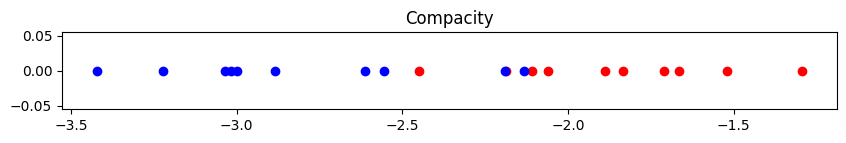

In [480]:
compacity_twos = [compacity(img) for img in twos_post]
compacity_threes = [compacity(img) for img in threes_post]

plt.figure(figsize=(10,1))
plt.plot(compacity_twos, np.zeros_like(compacity_twos), "o", color="r", label="twos")
plt.plot(
    compacity_threes, np.zeros_like(compacity_threes), "o", color="b", label="threes"
)
plt.title("Compacity")
plt.show()

####  Discussion

TODO

### 2.2. Additional method (4 pts)

In [ ]:
# TODO

#### Discussion

TODO